you HAVE to uninstall everything first THEN install. DO NOTE RESTART. IT WILL KEEP TRYING TO FORCE YOU INTO TF 2.18.0 ALWAYS CHECK.

Also - must remove cuda and redownload 11.8

changelog 11/26
- reorganized entire notebook
- much easier execution path
- cleaned up scripts
- train and test images clearly denoted
- scraping logs, processing, and graphing
- inference detecting lines and circles

https://github.com/VidishMehta001/ObjectDetection/blob/master/ObjectDetectionPipeline.ipynb
https://www.tensorflow.org/hub/tutorials/object_detection#helper_functions_for_downloading_images_and_for_visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/finalproj'

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/finalproj


In [ ]:
# @title purging cuda
!apt-get --purge remove cuda nvidia* libnividia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'nvidia-driver-550-server' for glob 'nvidia*'
Note, selecting 'nvidia-firmware-535-535.154.05' for glob 'nvidia*'
Note, selecting 'nvidia-docker2' for glob 'nvidia*'
Note, selecting 'nvidia-firmware-560-server-560.28.03' for glob 'nvidia*'
Note, selecting 'nvidia-cuda-toolkit-doc' for glob 'nvidia*'
Note, selecting 'nvidia-imex' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-firmware-535-server-535.154.05' for glob 'nvidia*'
Note, selecting 'nvidia-headless-390' for glob 'nvidia*'
Note, selecting 'nvidia-cuda-toolkit-gcc' for glob 'nvidia*'
Note, selecting 'nvidia-headless-418' for glob 'nvidia*'
Note, selecting 'nvidia-headless-430' for glob 'nvidia*'
Note, selecting 'nvidia-headless-435' for glob 'nvidia*'
Note, selecting 'nvidia-headless-440' for glob 'nvidia*'
Note, selecting 'nvidia-headless-450' for glob 'nvidia*'

In [ ]:
# @title download and install cuda 11.8 after the purging
!wget https://developer.download.nvidia.com/compute/cuda/11.8.0/local_installers/cuda_11.8.0_520.61.05_linux.run
!chmod +x cuda_11.8.0_520.61.05_linux.run
!./cuda_11.8.0_520.61.05_linux.run --silent --toolkit


--2024-12-05 01:48:49--  https://developer.download.nvidia.com/compute/cuda/11.8.0/local_installers/cuda_11.8.0_520.61.05_linux.run
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4336730777 (4.0G) [application/octet-stream]
Saving to: ‘cuda_11.8.0_520.61.05_linux.run’

cuda_11.8.0_520.61. 100%[===================>]   4.04G  73.4MB/s    in 24s     

2024-12-05 01:49:13 (170 MB/s) - ‘cuda_11.8.0_520.61.05_linux.run’ saved [4336730777/4336730777]



In [ ]:
# @title finihsing above
!tar -xzvf cudnn-linux-x86_64-8.x.x.x_cuda11-8.tar.gz -C /usr/local
!ldconfig


tar (child): cudnn-linux-x86_64-8.x.x.x_cuda11-8.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
/sbin/ldconfig.real: /usr/local/lib/libtcm.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libhwloc.so.15 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_loader.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtcm_debug.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_level_zero.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_opencl.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libumf.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symboli

In [ ]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 4305, done.
remote: Counting objects: 100% (4305/4305), done.
remote: Compressing objects: 100% (3315/3315), done.
remote: Total 4305 (delta 1212), reused 2205 (delta 917), pack-reused 0 (from 0)
Receiving objects: 100% (4305/4305), 53.16 MiB | 24.95 MiB/s, done.
Resolving deltas: 100% (1212/1212), done.


In [ ]:
!sudo apt install -y protobuf-compiler
%cd models/research/
# %cd '/content/drive/MyDrive/Colab Notebooks/finalproj'
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
protobuf-compiler is already the newest version (3.12.4-1ubuntu7.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/content/models/research
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is 

In [ ]:
# @title downgrade numpy and protobuf

!pip install numpy==1.24.3
!pip install protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.


In [ ]:
!pip install tensorflow=="2.13.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 26.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      Successfully uninstalled gast-0.6.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.1
    Uninstalling google-auth-oauthlib-1.2.1:
      Successfully uninstalled google-auth-o

In [ ]:
# @title checking ubuntu v
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


In [ ]:
!pip install tensorrt

In [ ]:
print("The following GPU devices are available: %s" % tf.config.list_physical_devices('GPU'))

The following GPU devices are available: []


In [ ]:
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

The following GPU devices are available: 


In [ ]:
!tf.test.is_gpu_available()

/bin/bash: -c: line 2: syntax error: unexpected end of file


In [ ]:
print(f"tf ({tf.__version__})")
print(f"gpus : {tf.config.experimental.list_physical_devices('GPU')}")

tf (2.13.0)
gpus : []


In [ ]:
!nvidia-smi

Tue Nov 26 14:59:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!pip uninstall protobuf==4.25.5 -y

Found existing installation: protobuf 4.25.5
Uninstalling protobuf-4.25.5:
  Successfully uninstalled protobuf-4.25.5


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf-models-official, tf_keras


In [ ]:
!pip show protobuf

Name: protobuf
Version: 3.20.3
Summary: Protocol Buffers
Home-page: https://developers.google.com/protocol-buffers/
Author: 
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: apache-beam, google-ai-generativelanguage, google-api-core, google-cloud-aiplatform, google-cloud-bigquery-connection, google-cloud-bigquery-storage, google-cloud-bigtable, google-cloud-datastore, google-cloud-firestore, google-cloud-functions, google-cloud-iam, google-cloud-language, google-cloud-pubsub, google-cloud-resource-manager, google-cloud-translate, google-generativeai, googleapis-common-protos, grpc-google-iam-v1, grpcio-status, orbax-checkpoint, proto-plus, tensorboard, tensorflow, tensorflow-datasets, tensorflow-hub, tensorflow-metadata, wandb


In [ ]:
import os
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'


In [ ]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

%matplotlib inline


In [ ]:
#run model builder test
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2024-12-05 02:00:48.999263: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Running tests under Python 3.10.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2024-12-05 02:00:56.694496: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W1205 02:00:56.740540 139936146469504 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W1205 02:00:57.176353 139936146469504 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.11s
I1205 02:00:57.648394 139936146469504 test_uti

In [ ]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')

In [ ]:
%cd /content

/content


In [ ]:
%ls

cuda_11.8.0_520.61.05_linux.run*  models/  sample_data/


In [ ]:
num_train_images = 1000
num_test_images  = 200
test_images_path = "/content/test_images4"
train_images_path = "/content/train_images4"

In [ ]:
import matplotlib.pyplot as plt
import math
import cv2
import os
import random
import xml.etree.ElementTree as ET
from xml.dom import minidom
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
%ls

In [ ]:
%cd /content


/content


begin train image generation
make sure at /content

horizontal with circles

In [ ]:
import os
import numpy as np
from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET

# Directories for images and annotations
annotation_dir = os.path.join(train_images_path, "annotations")
os.makedirs(train_images_path, exist_ok=True)
os.makedirs(annotation_dir, exist_ok=True)

# Parameters
num_images = 1000
image_size = (320, 320)
line_color = (0, 0, 0)
background_color = (255, 255, 255)

def create_xml_annotation(filename, width, height, objects, annotation_dir):
    """
    Creates an XML annotation file for the given image and bounding boxes of objects.
    """
    annotation = ET.Element("annotation")

    # Folder
    folder = ET.SubElement(annotation, "folder")
    folder.text = os.path.basename(train_images_path)

    # Filename
    filename_elem = ET.SubElement(annotation, "filename")
    filename_elem.text = filename

    # Path
    path = ET.SubElement(annotation, "path")
    path.text = os.path.join(train_images_path, filename)

    # Source
    source = ET.SubElement(annotation, "source")
    database = ET.SubElement(source, "database")
    database.text = "Generated Images"

    # Size
    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "3"

    # Segmented
    segmented = ET.SubElement(annotation, "segmented")
    segmented.text = "0"

    # Add each object to the annotation
    for obj in objects:
        object_elem = ET.SubElement(annotation, "object")
        name = ET.SubElement(object_elem, "name")
        name.text = obj['name']
        pose = ET.SubElement(object_elem, "pose")
        pose.text = "Unspecified"
        truncated = ET.SubElement(object_elem, "truncated")
        truncated.text = "0"
        difficult = ET.SubElement(object_elem, "difficult")
        difficult.text = "0"

        # Bounding box
        bndbox = ET.SubElement(object_elem, "bndbox")
        ET.SubElement(bndbox, "xmin").text = str(obj['bbox'][0])
        ET.SubElement(bndbox, "ymin").text = str(obj['bbox'][1])
        ET.SubElement(bndbox, "xmax").text = str(obj['bbox'][2])
        ET.SubElement(bndbox, "ymax").text = str(obj['bbox'][3])

    # Write the annotation file
    annotation_filename = os.path.join(annotation_dir, filename.replace(".jpg", ".xml"))
    tree = ET.ElementTree(annotation)
    tree.write(annotation_filename)
    # print(f"Annotation written: {annotation_filename}")

def generate_images_with_lines_and_circle():
    for i in range(num_images):
        # Create a blank white image
        img = Image.new("RGB", image_size, background_color)
        draw = ImageDraw.Draw(img)

        # List to hold objects for XML annotation
        objects = []

        # Generate 2 to 3 horizontal lines
        num_lines = np.random.randint(2, 4)  # Randomly choose between 2 and 3 lines
        for _ in range(num_lines):
            y = np.random.randint(0, image_size[1] - 50)  # Random y-coordinate for the line
            line_width = np.random.randint(10, 20)  # Minimum 10 pixels thick
            x1 = np.random.randint(0, image_size[0] - 50)  # Ensure room for minimum length
            x2 = np.random.randint(x1 + 50, image_size[0])  # Ensure minimum length of 50 pixels
            draw.line([(x1, y), (x2, y)], fill=line_color, width=line_width)

            # Add line to objects for annotation
            objects.append({
                "name": "line",
                "bbox": (x1, y - line_width // 2, x2, y + line_width // 2)
            })

        # Generate a random circle
        circle_radius = np.random.randint(10, 30)
        circle_x = np.random.randint(0 + circle_radius, image_size[0] - circle_radius)
        circle_y = np.random.randint(0 + circle_radius, image_size[1] - circle_radius)
        draw.ellipse(
            [
                (circle_x - circle_radius, circle_y - circle_radius),
                (circle_x + circle_radius, circle_y + circle_radius),
            ],
            fill=line_color,
            outline=line_color,
        )

        # Add circle to objects for annotation
        objects.append({
            "name": "circle",
            "bbox": (
                circle_x - circle_radius,
                circle_y - circle_radius,
                circle_x + circle_radius,
                circle_y + circle_radius,
            )
        })

        # Save the image
        image_filename = f"lines_and_circle_annotated_image_{i+1}.jpg"
        img.save(os.path.join(train_images_path, image_filename))
        # print(f"Image saved: {image_filename}")

        # Create XML annotation for the image
        create_xml_annotation(image_filename, image_size[0], image_size[1], objects, annotation_dir)

# Generate images with 2-3 horizontal lines and 1 circle, along with annotations
generate_images_with_lines_and_circle()

print("Generated images with lines and circles, with corresponding XML annotations.")


Generated images with lines and circles, with corresponding XML annotations.


horizontal lines

In [ ]:
import numpy as np
from PIL import Image, ImageDraw
import os
import xml.etree.ElementTree as ET

# Directories to save generated images and annotations
annotation_dir = os.path.join(train_images_path, "annotations")
os.makedirs(train_images_path, exist_ok=True)
os.makedirs(annotation_dir, exist_ok=True)

# Parameters for generating images
image_size = (320, 320)  # Image dimensions
line_color = (0, 0, 0)  # Black line
background_color = (255, 255, 255)  # White background

def create_xml_annotation(filename, width, height, line_coords, output_dir):
    """
    Creates an XML annotation file for the given image and line bounding box.
    """
    annotation = ET.Element("annotation")

    # Folder
    folder = ET.SubElement(annotation, "folder")
    folder.text = os.path.basename(annotation_dir)

    # Filename
    filename_elem = ET.SubElement(annotation, "filename")
    filename_elem.text = filename

    # Path
    path = ET.SubElement(annotation, "path")
    path.text = os.path.join(annotation_dir, filename)

    # Source
    source = ET.SubElement(annotation, "source")
    database = ET.SubElement(source, "database")
    database.text = "Generated Images"

    # Size
    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "3"

    # Segmented
    segmented = ET.SubElement(annotation, "segmented")
    segmented.text = "0"

    # Object
    obj = ET.SubElement(annotation, "object")
    name = ET.SubElement(obj, "name")
    name.text = "line"
    pose = ET.SubElement(obj, "pose")
    pose.text = "Unspecified"
    truncated = ET.SubElement(obj, "truncated")
    truncated.text = "0"
    difficult = ET.SubElement(obj, "difficult")
    difficult.text = "0"

    # Bounding box
    bndbox = ET.SubElement(obj, "bndbox")
    xmin = ET.SubElement(bndbox, "xmin")
    ymin = ET.SubElement(bndbox, "ymin")
    xmax = ET.SubElement(bndbox, "xmax")
    ymax = ET.SubElement(bndbox, "ymax")

    # Correct the bounding box to account for thickness
    x1, y_center, x2, _ = line_coords
    line_thickness = line_coords[3] - line_coords[1]  # Assuming thickness is already provided
    ymin.text = str(y_center - line_thickness // 2)
    ymax.text = str(y_center + line_thickness // 2)
    xmin.text = str(x1)
    xmax.text = str(x2)

    # Write to file
    tree = ET.ElementTree(annotation)
    annotation_filename = os.path.join(annotation_dir, filename.replace(".jpg", ".xml"))
    tree.write(annotation_filename)

# Function to create horizontal lines
def generate_horizontal_lines_min_length():
    for i in range(num_train_images):
        # Create a blank white image
        img = Image.new("RGB", image_size, background_color)
        draw = ImageDraw.Draw(img)

        # Generate random horizontal line parameters
        y = np.random.randint(0, image_size[1])  # Random y-coordinate for the line
        line_width = np.random.randint(5, 20)  # Random line thickness (minimum 5 pixels)
        x1 = np.random.randint(0, image_size[0] - 50)  # Ensure room for minimum line length
        x2 = np.random.randint(x1 + 50, image_size[0])  # Ensure minimum length of 25 pixels

        # Draw the horizontal line
        draw.line([(x1, y), (x2+50, y)], fill=line_color, width=line_width)

        # Save the image
        image_filename = f"horizontal_line_{i+1}.jpg"
        img.save(os.path.join(train_images_path, image_filename))

        # Create XML annotation for the bounding box
        create_xml_annotation(
            image_filename,
            image_size[0],
            image_size[1],
            (x1, y, x2+50, y + line_width),  # Provide full thickness in the coordinates
            annotation_dir
        )

# Generate the images and annotations
generate_horizontal_lines_min_length()

print(f"Generated {num_train_images} images with horizontal lines and corresponding XML annotations.")


Generated 1000 images with horizontal lines and corresponding XML annotations.


circle generation

In [ ]:


# Set parameters
image_width, image_height = 320, 320  # Image dimensions

# Create output directories
os.makedirs(train_images_path, exist_ok=True)
os.makedirs(f"{train_images_path}/annotations", exist_ok=True)

# Function to create XML annotation
def create_voc_xml(filename, width, height, object_data):
    annotation = ET.Element("annotation")
    ET.SubElement(annotation, "folder").text = "images"
    ET.SubElement(annotation, "filename").text = filename
    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "3"

    for obj in object_data:
        obj_elem = ET.SubElement(annotation, "object")
        ET.SubElement(obj_elem, "name").text = "circle"
        bndbox = ET.SubElement(obj_elem, "bndbox")
        ET.SubElement(bndbox, "xmin").text = str(obj["xmin"])
        ET.SubElement(bndbox, "ymin").text = str(obj["ymin"])
        ET.SubElement(bndbox, "xmax").text = str(obj["xmax"])
        ET.SubElement(bndbox, "ymax").text = str(obj["ymax"])

    # Format XML nicely
    xml_str = minidom.parseString(ET.tostring(annotation)).toprettyxml(indent="   ")
    return xml_str

# Generate images with circles
for i in range(num_train_images):
    # Create a white background image
    image = 255 * np.ones((image_height, image_width, 3), dtype=np.uint8)
    object_data = []
    num_circles =  1 #random.randint(1, 5)  # Number of circles per image

    for _ in range(num_circles):
        # Randomize circle properties
        radius = random.randint(10, 50)
        center_x = random.randint(radius, image_width - radius)
        center_y = random.randint(radius, image_height - radius)

        # Draw the circle on the image
        cv2.circle(image, (center_x, center_y), radius, (0, 0, 0), -1)  # Black circle

        # Calculate bounding box coordinates
        xmin = center_x - radius
        ymin = center_y - radius
        xmax = center_x + radius
        ymax = center_y + radius

        # Store object data for annotation
        object_data.append({"xmin": xmin, "ymin": ymin, "xmax": xmax, "ymax": ymax})

    # Save image
    image_filename = f"{train_images_path}/image_{i + 1}.jpg"
    cv2.imwrite(image_filename, image)

    # Create and save XML annotation
    annotation_xml = create_voc_xml(f"image_{i + 1}.jpg", image_width, image_height, object_data)
    annotation_path = f"{train_images_path}/annotations/image_{i + 1}.xml"
    with open(annotation_path, "w") as f:
        f.write(annotation_xml)

    # print(f"Generated {image_filename} with {len(object_data)} circles.")

print(f"Generated {num_train_images} images with a single circleand corresponding XML annotations.")



Generated 1000 images with a single circleand corresponding XML annotations.



circle with line annotated

In [ ]:
import os
import numpy as np
from PIL import Image, ImageDraw

# Parameters
image_size = (320, 320)  # Image dimensions (width, height)
annotation_dir = f"{train_images_path}/annotations"
line_color = (0, 0, 0)  # Line color (black)
background_color = (255, 255, 255)  # Background color (white)

# Create output directories
os.makedirs(train_images_path, exist_ok=True)
os.makedirs(annotation_dir, exist_ok=True)

def create_xml_annotation(image_name, img_width, img_height, bbox, annotation_dir):
    """Create an XML annotation file for the generated image."""
    x_min, y_min, x_max, y_max = bbox
    annotation_content = f"""<annotation>
    <filename>{image_name}</filename>
    <size>
        <width>{img_width}</width>
        <height>{img_height}</height>
        <depth>3</depth>
    </size>
    <object>
        <name>line</name>
        <bndbox>
            <xmin>{x_min}</xmin>
            <ymin>{y_min}</ymin>
            <xmax>{x_max}</xmax>
            <ymax>{y_max}</ymax>
        </bndbox>
    </object>
</annotation>"""

    annotation_path = os.path.join(annotation_dir, image_name.replace(".jpg", ".xml"))
    with open(annotation_path, "w") as f:
        f.write(annotation_content)

def generate_line_and_circle_with_constraints():
    for i in range(num_train_images):
        # Create a blank white image
        img = Image.new("RGB", image_size, background_color)
        draw = ImageDraw.Draw(img)

        # Generate a random line
        line_type = np.random.choice(['horizontal', 'vertical'])
        if line_type == 'horizontal':
            y = np.random.randint(50, image_size[1] - 50)  # Leave space for other objects
            line_width = np.random.randint(10, 20)  # Minimum 10 pixels thick
            x1 = np.random.randint(0, image_size[0] - 50)  # Ensure room for minimum length
            x2 = np.random.randint(x1 + 50, image_size[0])  # Ensure minimum length of 50 pixels
            draw.line([(x1, y), (x2, y)], fill=line_color, width=line_width)
            bbox = (x1, y - line_width // 2, x2, y + line_width // 2)
        else:
            x = np.random.randint(50, image_size[0] - 50)  # Leave space for other objects
            line_width = np.random.randint(10, 20)  # Minimum 10 pixels thick
            y1 = np.random.randint(0, image_size[1] - 50)  # Ensure room for minimum length
            y2 = np.random.randint(y1 + 50, image_size[1])  # Ensure minimum length of 50 pixels
            draw.line([(x, y1), (x, y2)], fill=line_color, width=line_width)
            bbox = (x - line_width // 2, y1, x + line_width // 2, y2)

        # Generate a random circle
        circle_radius = np.random.randint(10, 30)
        circle_x = np.random.randint(0 + circle_radius, image_size[0] - circle_radius)
        circle_y = np.random.randint(0 + circle_radius, image_size[1] - circle_radius)
        draw.ellipse(
            [
                (circle_x - circle_radius, circle_y - circle_radius),
                (circle_x + circle_radius, circle_y + circle_radius),
            ],
            fill=line_color,
            outline=line_color,
        )

        # Save the image
        image_filename = f"line_and_circle_{i+1}.jpg"
        img.save(os.path.join(train_images_path, image_filename))

        # Create annotation for the line
        create_xml_annotation(image_filename, image_size[0], image_size[1], bbox, annotation_dir)
        # print(f"Image and annotation saved: {image_filename}")

# Generate images with a line (at least 10px thick, 50px long) and a circle, but annotate only the line
generate_line_and_circle_with_constraints()

print("Generated 1000 images with horizontal and vertical lines and circles with line annotations.")


Generated 1000 images with horizontal and vertical lines and circles with line annotations.


In [ ]:
%cd ../../

/content


In [ ]:
# @title view image
image_path = "/content/generated_images1/image_1.jpg"  # replace with your uploaded file name
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


create train tfrecord

In [ ]:
import glob
from object_detection.utils import dataset_util

label_map_dict = {
    "circle": 1,
    "line": 2# Add other labels if needed
}



def create_example(xml_root, label_map_dict):
    filename = xml_root.find('filename').text
    image_format = b'jpg'  # or 'png' depending on your images

    # Image dimensions
    width = int(xml_root.find('size/width').text)
    height = int(xml_root.find('size/height').text)

    # Prepare lists for bounding box data
    xmins, xmaxs, ymins, ymaxs, classes_text, classes = [], [], [], [], [], []

    for obj in xml_root.findall('object'):
        class_name = obj.find('name').text
        if class_name in label_map_dict:
            classes_text.append(class_name.encode('utf8'))
            classes.append(label_map_dict[class_name])

            # Bounding box coordinates
            bndbox = obj.find('bndbox')
            xmins.append(float(bndbox.find('xmin').text) / width)
            xmaxs.append(float(bndbox.find('xmax').text) / width)
            ymins.append(float(bndbox.find('ymin').text) / height)
            ymaxs.append(float(bndbox.find('ymax').text) / height)

    # Load the image and encode it in binary format
    with tf.io.gfile.GFile(f'{train_images_path}/{filename}', 'rb') as fid:
        encoded_image_data = fid.read()

    # Create a TFRecord example
    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename.encode('utf8')),
        'image/source_id': dataset_util.bytes_feature(filename.encode('utf8')),
        'image/encoded': dataset_util.bytes_feature(encoded_image_data),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

# Define functions to create TFRecord
def xml_to_tfrecord(annotations_dir, output_path, label_map_dict):
    writer = tf.io.TFRecordWriter(output_path)
    xml_files = glob.glob(os.path.join(annotations_dir, "*.xml"))
    print(f"Found {len(xml_files)} XML files in {annotations_dir}")
    for xml_file in xml_files:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        tf_example = create_example(root, label_map_dict)
        writer.write(tf_example.SerializeToString())
    # with open(output_path, "w") as f:
    #       f.write("train.record", tf_example)
    # f.close()
    writer.close()
    print(f"TFRecord file created at: {output_path}")
# Paths
annotations_dir = f'{train_images_path}/annotations'  # Path to your annotations folder
output_path = f'{train_images_path}/train.record'     # Path where TFRecord will be saved



# Generate the TFRecord
xml_to_tfrecord(annotations_dir, output_path, label_map_dict)

Found 4000 XML files in /content/train_images4/annotations
TFRecord file created at: /content/train_images4/train.record


test image creation

In [ ]:
import os
import numpy as np
from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET

# Directories for images and annotations
annotation_dir = os.path.join(test_images_path, "annotations")
os.makedirs(test_images_path, exist_ok=True)
os.makedirs(annotation_dir, exist_ok=True)

# Parameters
num_images = 200
image_size = (320, 320)
line_color = (0, 0, 0)
background_color = (255, 255, 255)

def create_xml_annotation(filename, width, height, objects, annotation_dir):
    """
    Creates an XML annotation file for the given image and bounding boxes of objects.
    """
    annotation = ET.Element("annotation")

    # Folder
    folder = ET.SubElement(annotation, "folder")
    folder.text = os.path.basename(test_images_path)

    # Filename
    filename_elem = ET.SubElement(annotation, "filename")
    filename_elem.text = filename

    # Path
    path = ET.SubElement(annotation, "path")
    path.text = os.path.join(test_images_path, filename)

    # Source
    source = ET.SubElement(annotation, "source")
    database = ET.SubElement(source, "database")
    database.text = "Generated Images"

    # Size
    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "3"

    # Segmented
    segmented = ET.SubElement(annotation, "segmented")
    segmented.text = "0"

    # Add each object to the annotation
    for obj in objects:
        object_elem = ET.SubElement(annotation, "object")
        name = ET.SubElement(object_elem, "name")
        name.text = obj['name']
        pose = ET.SubElement(object_elem, "pose")
        pose.text = "Unspecified"
        truncated = ET.SubElement(object_elem, "truncated")
        truncated.text = "0"
        difficult = ET.SubElement(object_elem, "difficult")
        difficult.text = "0"

        # Bounding box
        bndbox = ET.SubElement(object_elem, "bndbox")
        ET.SubElement(bndbox, "xmin").text = str(obj['bbox'][0])
        ET.SubElement(bndbox, "ymin").text = str(obj['bbox'][1])
        ET.SubElement(bndbox, "xmax").text = str(obj['bbox'][2])
        ET.SubElement(bndbox, "ymax").text = str(obj['bbox'][3])

    # Write the annotation file
    annotation_filename = os.path.join(annotation_dir, filename.replace(".jpg", ".xml"))
    tree = ET.ElementTree(annotation)
    tree.write(annotation_filename)
    # print(f"Annotation written: {annotation_filename}")

def generate_images_with_lines_and_circle():
    for i in range(num_images):
        # Create a blank white image
        img = Image.new("RGB", image_size, background_color)
        draw = ImageDraw.Draw(img)

        # List to hold objects for XML annotation
        objects = []

        # Generate 2 to 3 horizontal lines
        num_lines = np.random.randint(2, 4)  # Randomly choose between 2 and 3 lines
        for _ in range(num_lines):
            y = np.random.randint(0, image_size[1] - 50)  # Random y-coordinate for the line
            line_width = np.random.randint(10, 20)  # Minimum 10 pixels thick
            x1 = np.random.randint(0, image_size[0] - 50)  # Ensure room for minimum length
            x2 = np.random.randint(x1 + 50, image_size[0])  # Ensure minimum length of 50 pixels
            draw.line([(x1, y), (x2, y)], fill=line_color, width=line_width)

            # Add line to objects for annotation
            objects.append({
                "name": "line",
                "bbox": (x1, y - line_width // 2, x2, y + line_width // 2)
            })

        # Generate a random circle
        circle_radius = np.random.randint(10, 30)
        circle_x = np.random.randint(0 + circle_radius, image_size[0] - circle_radius)
        circle_y = np.random.randint(0 + circle_radius, image_size[1] - circle_radius)
        draw.ellipse(
            [
                (circle_x - circle_radius, circle_y - circle_radius),
                (circle_x + circle_radius, circle_y + circle_radius),
            ],
            fill=line_color,
            outline=line_color,
        )

        # Add circle to objects for annotation
        objects.append({
            "name": "circle",
            "bbox": (
                circle_x - circle_radius,
                circle_y - circle_radius,
                circle_x + circle_radius,
                circle_y + circle_radius,
            )
        })

        # Save the image
        image_filename = f"lines_and_circle_annotated_image_{i+1}.jpg"
        img.save(os.path.join(test_images_path, image_filename))
        # print(f"Image saved: {image_filename}")

        # Create XML annotation for the image
        create_xml_annotation(image_filename, image_size[0], image_size[1], objects, annotation_dir)

# Generate images with 2-3 horizontal lines and 1 circle, along with annotations
generate_images_with_lines_and_circle()

print("Generated images with lines and circles, with corresponding XML annotations.")


Generated images with lines and circles, with corresponding XML annotations.


In [ ]:


# Set parameters  # Number of images to generate
image_width, image_height = 320, 320  # Image dimensions

# Create output directories
os.makedirs(test_images_path, exist_ok=True)
os.makedirs(f"{test_images_path}/annotations", exist_ok=True)

# Function to create XML annotation
def create_voc_xml(filename, width, height, object_data):
    annotation = ET.Element("annotation")
    ET.SubElement(annotation, "folder").text = "images"
    ET.SubElement(annotation, "filename").text = filename
    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "3"

    for obj in object_data:
        obj_elem = ET.SubElement(annotation, "object")
        ET.SubElement(obj_elem, "name").text = "circle"
        bndbox = ET.SubElement(obj_elem, "bndbox")
        ET.SubElement(bndbox, "xmin").text = str(obj["xmin"])
        ET.SubElement(bndbox, "ymin").text = str(obj["ymin"])
        ET.SubElement(bndbox, "xmax").text = str(obj["xmax"])
        ET.SubElement(bndbox, "ymax").text = str(obj["ymax"])

    # Format XML nicely
    xml_str = minidom.parseString(ET.tostring(annotation)).toprettyxml(indent="   ")
    return xml_str

# Generate images with circles
for i in range(num_test_images):
    # Create a white background image
    image = 255 * np.ones((image_height, image_width, 3), dtype=np.uint8)
    object_data = []
    num_circles =  1 #random.randint(1, 5)  # Number of circles per image

    for _ in range(num_circles):
        # Randomize circle properties
        radius = random.randint(10, 50)
        center_x = random.randint(radius, image_width - radius)
        center_y = random.randint(radius, image_height - radius)

        # Draw the circle on the image
        cv2.circle(image, (center_x, center_y), radius, (0, 0, 0), -1)  # Black circle

        # Calculate bounding box coordinates
        xmin = center_x - radius
        ymin = center_y - radius
        xmax = center_x + radius
        ymax = center_y + radius

        # Store object data for annotation
        object_data.append({"xmin": xmin, "ymin": ymin, "xmax": xmax, "ymax": ymax})

    # Save image
    image_filename = f"{test_images_path}/image_{i + 1}.jpg"
    cv2.imwrite(image_filename, image)

    # Create and save XML annotation
    annotation_xml = create_voc_xml(f"image_{i + 1}.jpg", image_width, image_height, object_data)
    annotation_path = f"{test_images_path}/annotations/image_{i + 1}.xml"
    with open(annotation_path, "w") as f:
        f.write(annotation_xml)

    # print(f"Generated {image_filename} with {len(object_data)} circles.")

print("test Image and annotation generation complete!")


test Image and annotation generation complete!


In [ ]:
import numpy as np
from PIL import Image, ImageDraw
import os
import xml.etree.ElementTree as ET

# Directories to save generated images and annotations
annotation_dir = os.path.join(test_images_path, "annotations")
os.makedirs(test_images_path, exist_ok=True)
os.makedirs(annotation_dir, exist_ok=True)

# Parameters for generating images
image_size = (320, 320)  # Image dimensions
line_color = (0, 0, 0)  # Black line
background_color = (255, 255, 255)  # White background

def create_xml_annotation(filename, width, height, line_coords, output_dir):
    """
    Creates an XML annotation file for the given image and line bounding box.
    """
    annotation = ET.Element("annotation")

    # Folder
    folder = ET.SubElement(annotation, "folder")
    folder.text = os.path.basename(output_dir)

    # Filename
    filename_elem = ET.SubElement(annotation, "filename")
    filename_elem.text = filename

    # Path
    path = ET.SubElement(annotation, "path")
    path.text = os.path.join(output_dir, filename)

    # Source
    source = ET.SubElement(annotation, "source")
    database = ET.SubElement(source, "database")
    database.text = "Generated Images"

    # Size
    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "3"

    # Segmented
    segmented = ET.SubElement(annotation, "segmented")
    segmented.text = "0"

    # Object
    obj = ET.SubElement(annotation, "object")
    name = ET.SubElement(obj, "name")
    name.text = "line"
    pose = ET.SubElement(obj, "pose")
    pose.text = "Unspecified"
    truncated = ET.SubElement(obj, "truncated")
    truncated.text = "0"
    difficult = ET.SubElement(obj, "difficult")
    difficult.text = "0"

    # Bounding box
    bndbox = ET.SubElement(obj, "bndbox")
    xmin = ET.SubElement(bndbox, "xmin")
    ymin = ET.SubElement(bndbox, "ymin")
    xmax = ET.SubElement(bndbox, "xmax")
    ymax = ET.SubElement(bndbox, "ymax")

    # Correct the bounding box to account for thickness
    x1, y_center, x2, _ = line_coords
    line_thickness = line_coords[3] - line_coords[1]  # Assuming thickness is already provided
    ymin.text = str(y_center - line_thickness // 2)
    ymax.text = str(y_center + line_thickness // 2)
    xmin.text = str(x1)
    xmax.text = str(x2)

    # Write to file
    tree = ET.ElementTree(annotation)
    annotation_filename = os.path.join(output_dir, filename.replace(".jpg", ".xml"))
    tree.write(annotation_filename)

# Function to create horizontal lines
def generate_horizontal_lines_min_length():
    for i in range(num_test_images):
        # Create a blank white image
        img = Image.new("RGB", image_size, background_color)
        draw = ImageDraw.Draw(img)

        # Generate random horizontal line parameters
        y = np.random.randint(0, image_size[1])  # Random y-coordinate for the line
        line_width = np.random.randint(5, 20)  # Random line thickness (minimum 5 pixels)
        x1 = np.random.randint(0, image_size[0] - 25)  # Ensure room for minimum line length
        x2 = np.random.randint(x1 + 25, image_size[0])  # Ensure minimum length of 25 pixels

        # Draw the horizontal line
        draw.line([(x1, y), (x2, y)], fill=line_color, width=line_width)

        # Save the image
        image_filename = f"horizontal_line_{i+1}.jpg"
        img.save(os.path.join(test_images_path, image_filename))

        # Create XML annotation for the bounding box
        create_xml_annotation(
            image_filename,
            image_size[0],
            image_size[1],
            (x1, y, x2, y + line_width),  # Provide full thickness in the coordinates
            annotation_dir
        )

# Generate the images and annotations
generate_horizontal_lines_min_length()

print(f"Generated {num_test_images} test images with horizontal lines and corresponding XML annotations.")


Generated 200 test images with horizontal lines and corresponding XML annotations.


test images with circle and line

In [ ]:
import os
import numpy as np
from PIL import Image, ImageDraw

# Parameters
image_size = (320, 320)  # Image dimensions (width, height)
annotation_dir = f"{test_images_path}/annotations"
line_color = (0, 0, 0)  # Line color (black)
background_color = (255, 255, 255)  # Background color (white)

# Create output directories
os.makedirs(test_images_path, exist_ok=True)
os.makedirs(annotation_dir, exist_ok=True)

def create_xml_annotation(image_name, img_width, img_height, bbox, annotation_dir):
    """Create an XML annotation file for the generated image."""
    x_min, y_min, x_max, y_max = bbox
    annotation_content = f"""<annotation>
    <filename>{image_name}</filename>
    <size>
        <width>{img_width}</width>
        <height>{img_height}</height>
        <depth>3</depth>
    </size>
    <object>
        <name>line</name>
        <bndbox>
            <xmin>{x_min}</xmin>
            <ymin>{y_min}</ymin>
            <xmax>{x_max}</xmax>
            <ymax>{y_max}</ymax>
        </bndbox>
    </object>
</annotation>"""

    annotation_path = os.path.join(annotation_dir, image_name.replace(".jpg", ".xml"))
    with open(annotation_path, "w") as f:
        f.write(annotation_content)

def generate_line_and_circle_with_constraints():
    for i in range(num_test_images):
        # Create a blank white image
        img = Image.new("RGB", image_size, background_color)
        draw = ImageDraw.Draw(img)

        # Generate a random line
        line_type = np.random.choice(['horizontal', 'vertical'])
        if line_type == 'horizontal':
            y = np.random.randint(50, image_size[1] - 50)  # Leave space for other objects
            line_width = np.random.randint(10, 20)  # Minimum 10 pixels thick
            x1 = np.random.randint(0, image_size[0] - 50)  # Ensure room for minimum length
            x2 = np.random.randint(x1 + 50, image_size[0])  # Ensure minimum length of 50 pixels
            draw.line([(x1, y), (x2, y)], fill=line_color, width=line_width)
            bbox = (x1, y - line_width // 2, x2, y + line_width // 2)
        else:
            x = np.random.randint(50, image_size[0] - 50)  # Leave space for other objects
            line_width = np.random.randint(10, 20)  # Minimum 10 pixels thick
            y1 = np.random.randint(0, image_size[1] - 50)  # Ensure room for minimum length
            y2 = np.random.randint(y1 + 50, image_size[1])  # Ensure minimum length of 50 pixels
            draw.line([(x, y1), (x, y2)], fill=line_color, width=line_width)
            bbox = (x - line_width // 2, y1, x + line_width // 2, y2)

        # Generate a random circle
        circle_radius = np.random.randint(10, 30)
        circle_x = np.random.randint(0 + circle_radius, image_size[0] - circle_radius)
        circle_y = np.random.randint(0 + circle_radius, image_size[1] - circle_radius)
        draw.ellipse(
            [
                (circle_x - circle_radius, circle_y - circle_radius),
                (circle_x + circle_radius, circle_y + circle_radius),
            ],
            fill=line_color,
            outline=line_color,
        )

        # Save the image
        image_filename = f"line_and_circle_{i+1}.jpg"
        img.save(os.path.join(test_images_path, image_filename))

        # Create annotation for the line
        create_xml_annotation(image_filename, image_size[0], image_size[1], bbox, annotation_dir)
        # print(f"Image and annotation saved: {image_filename}")

# Generate images with a line (at least 10px thick, 50px long) and a circle, but annotate only the line
generate_line_and_circle_with_constraints()

print("Generated test images with line_and_circle and annotations for circle.")


Generated test images with line_and_circle and annotations for circle.


make test tfrecord

In [ ]:
import glob
from object_detection.utils import dataset_util

label_map_dict = {
    "circle": 1,
    "line": 2 # Add other labels if needed
}

def create_example(xml_root, label_map_dict):
    filename = xml_root.find('filename').text
    image_format = b'jpg'  # or 'png' depending on your images

    # Image dimensions
    width = int(xml_root.find('size/width').text)
    height = int(xml_root.find('size/height').text)

    # Prepare lists for bounding box data
    xmins, xmaxs, ymins, ymaxs, classes_text, classes = [], [], [], [], [], []

    for obj in xml_root.findall('object'):
        class_name = obj.find('name').text
        if class_name in label_map_dict:
            classes_text.append(class_name.encode('utf8'))
            classes.append(label_map_dict[class_name])

            # Bounding box coordinates
            bndbox = obj.find('bndbox')
            xmins.append(float(bndbox.find('xmin').text) / width)
            xmaxs.append(float(bndbox.find('xmax').text) / width)
            ymins.append(float(bndbox.find('ymin').text) / height)
            ymaxs.append(float(bndbox.find('ymax').text) / height)

    # Load the image and encode it in binary format
    with tf.io.gfile.GFile(f'{test_images_path}/{filename}', 'rb') as fid:
        encoded_image_data = fid.read()

    # Create a TFRecord example
    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename.encode('utf8')),
        'image/source_id': dataset_util.bytes_feature(filename.encode('utf8')),
        'image/encoded': dataset_util.bytes_feature(encoded_image_data),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

# Define functions to create TFRecord
def xml_to_tfrecord(annotations_dir, output_path, label_map_dict):
    writer = tf.io.TFRecordWriter(output_path)
    xml_files = glob.glob(os.path.join(annotations_dir, "*.xml"))
    print(f"Found {len(xml_files)} XML files in {annotations_dir}")
    for xml_file in xml_files:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        tf_example = create_example(root, label_map_dict)
        writer.write(tf_example.SerializeToString())
    # with open(output_path, "w") as f:
    #       f.write("train.record", tf_example)
    # f.close()
    writer.close()
    print(f"TFRecord file created at: {output_path}")
# Paths
annotations_dir = f'{test_images_path}/annotations'  # Path to your annotations folder
output_path = f'{test_images_path}/test.record'     # Path where TFRecord will be saved



# Generate the TFRecord
xml_to_tfrecord(annotations_dir, output_path, label_map_dict)

Found 800 XML files in /content/test_images4/annotations
TFRecord file created at: /content/test_images4/test.record


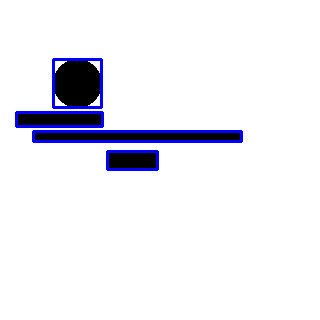

In [ ]:
from google.colab.patches import cv2_imshow
import os

def visualize_annotations(image_path, annotation_path):
    image = cv2.imread(image_path)
    tree = ET.parse(annotation_path)
    root = tree.getroot()

    for obj in root.findall('object'):
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    cv2_imshow(image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

# Example usage
visualize_annotations(f"{train_images_path}/lines_and_circle_annotated_image_100.jpg", f"{train_images_path}/annotations/lines_and_circle_annotated_image_100.xml")
# visualize_annotations(f"{train_images_path}/image_46.jpg", f"{train_images_path}/annotations/image_46.xml")

# visualize_annotations(f"{train_images_path}/line_and_circle_1.jpg", f"{train_images_path}/annotations/line_and_circle_1.xml")
# visualize_annotations(f"{train_images_path}/horizontal_line_46.jpg", f"{train_images_path}/annotations/horizontal_line_46.xml")
# visualize_annotations(f"{test_images_path}/horizontal_line_46.jpg", f"{test_images_path}/annotations/horizontal_line_46.xml")
# visualize_annotations(f"{test_images_path}/image_46.jpg", f"{test_images_path}/annotations/image_46.xml")
# visualize_annotations(f"{test_images_path}/line_and_circle_1.jpg", f"{test_images_path}/annotations/line_and_circle_1.xml")

# line_and_circle_

set label pathsand batch size

In [ ]:

labelmap_path = os.path.join(os.getcwd(), '/content/labelmap.pbtxt')

train_record_path = os.path.join(os.getcwd(), f'{train_images_path}/train.record')
test_record_path = os.path.join(os.getcwd(), f'{test_images_path}/test.record')

In [ ]:
batch_size = 8
num_steps = 10000
num_eval_steps = 75

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!tar -xf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
# !mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint models/research/object_detection/test_data

--2024-12-05 02:38:32--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.137.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M   121MB/s    in 0.2s    

2024-12-05 02:38:32 (121 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [ ]:
fine_tune_checkpoint = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0'
fine_tune_checkpoint = ''

In [ ]:
!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config
print(os.getcwd())

base_config_path = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config'

--2024-12-05 02:38:34--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4684 (4.6K) [text/plain]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config’

ssd_mobilenet_v2_fp 100%[===================>]   4.57K  --.-KB/s    in 0s      

2024-12-05 02:38:34 (70.7 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config’ saved [4684/4684]

/content


In [ ]:
base_config_path = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config'


In [ ]:
%cd /content


/content


create labelmap

In [ ]:
# Define the content of the labelmap.pbtxt file
labelmap_content = """item {
  id: 1
  name: "circle"
}
item {
  id: 2
  name: "line"
}
"""

# Specify the filename
filename = "labelmap.pbtxt"

# Write the content to the file
with open(filename, "w") as file:
    file.write(labelmap_content)

print(f"{filename} has been created with two items: circle and line.")


labelmap.pbtxt has been created with two items: circle and line.


In [ ]:


# edit configuration file (from https://colab.research.google.com/drive/1sLqFKVV94wm-lglFq_0kGo2ciM0kecWD)

import re

with open(base_config_path) as f:
    config = f.read()

with open('model_config.config', 'w') as f:

  # Set labelmap path
  config = re.sub('label_map_path: ".*?"',
             'label_map_path: "{}"'.format(labelmap_path), config)

  # Set fine_tune_checkpoint path
  config = re.sub('fine_tune_checkpoint: ".*?"',
                  'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), config)

  # Set train tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")',
                  'input_path: "{}"'.format(train_record_path), config)

  # Set test tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")',
                  'input_path: "{}"'.format(test_record_path), config)

  # Set number of classes.
  config = re.sub('num_classes: [0-9]+',
                  'num_classes: 2', config)

  # Set batch size
  config = re.sub('batch_size: [0-9]+',
                  'batch_size: {}'.format(batch_size), config)

  # Set training steps
  config = re.sub('num_steps: [0-9]+',
                  'num_steps: {}'.format(num_steps), config)

  # Set fine-tune checkpoint type to detection
  # config = re.sub('fine_tune_checkpoint_type: "classification"',
  #            'fine_tune_checkpoint_type: "{}"'.format('detection'), config)
  config = re.sub('fine_tune_checkpoint_type: "detection"',
             'fine_tune_checkpoint_type: "{}"'.format(''), config)

  f.write(config)


%cat model_config.config



# SSD with Mobilenet v2 FPN-lite (go/fpn-lite) feature extractor, shared box
# predictor and focal loss (a mobile version of Retinanet).
# Retinanet: see Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from Imagenet classification checkpoint
# Train on TPU-8
#
# Achieves 22.2 mAP on COCO17 Val

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 2
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
    anchor_generator {
      multiscale_anchor_generator {

change back to obj det location for training

In [ ]:
print(os.getcwd())
!ls
#not in drive
os.chdir('/content/models/research/object_detection')
model_dir = 'training/'
pipeline_config_path = '/content/model_config.config'

/content
cuda_11.8.0_520.61.05_linux.run
labelmap.pbtxt
model_config.config
models
sample_data
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
test_images1
test_images4
train_images1
train_images2
train_images3
train_images4


train

In [ ]:

!python model_main_tf2.py \
    --pipeline_config_path={pipeline_config_path} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps={num_eval_steps}

2024-12-05 02:38:46.420321: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-12-05 02:38:49.280142: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1205 02:38:49.281369 135657985811584 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 10000
I1205 02:38:49.304707 135657985811584 config_util.py:552] Maybe overwriting train_steps: 10000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1205 02:38:49.304881 135657985811584 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W1205 02:38:49.332707 135657985811584 d

In [ ]:
output_directory = 'inference_graph'
print(model_dir)
print(output_directory)
print(pipeline_config_path)

training/
inference_graph
/content/model_config.config


In [ ]:
%cd /content/models/research/object_detection

/content


export

In [ ]:
!python exporter_main_v2.py \
    --trained_checkpoint_dir {model_dir} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_config_path}


2024-12-05 03:04:56.230140: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-12-05 03:05:00.134463: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1205 03:05:00.391253 138850524607616 deprecation.py:641] From /usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py:459: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back

In [ ]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline


print(os.getcwd())

/content/models/research/object_detection


In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

In [ ]:
interpreter = tf.lite.Interpreter(model_path='/content/uppdated_finetune.tflite')

# Allocate tensors
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Details:", input_details)
print("Output Details:", output_details)

Input Details: [{'name': 'serving_default_input:0', 'index': 0, 'shape': array([  1, 320, 320,   3], dtype=int32), 'shape_signature': array([  1, 320, 320,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output Details: [{'name': 'StatefulPartitionedCall:1', 'index': 339, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([ 1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:3', 'index': 337, 'shape': array([ 1, 10,  4], dtype=int32), 'shape_signature': array([ 1, 10,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameter

In [ ]:
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'{output_directory}/saved_model')
print(model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x78bf95c22bf0>


In [ ]:
# @title setup image inference
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy()
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()

  return output_dict

In [ ]:
%cd /content

/content


Loading model...
Model loaded!
Running inference...
Inference complete!
Output saved to /content/output_image.jpg


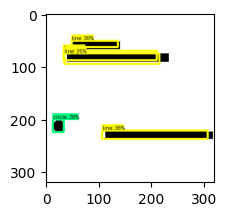

In [ ]:
# @title run inference and draw bound boxes
import tensorflow as tf
import numpy as np
import cv2
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

# Paths
PATH_TO_LABELS = "/content/labelmap.pbtxt"
OUTPUT_IMAGE_PATH = "/content/output_image.jpg"

# Load the model
print("Loading model...")
print("Model loaded!")

# Load the label map
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

# Load the image
# image_np = cv2.imread('/content/generated_images1/image_174.jpg')
# image_np = cv2.imread(f'{train_images_path}/horizontal_line_84.jpg')
# image_np = cv2.imread(f'{train_images_path}/line_and_circle_12.jpg')
image_np = cv2.imread(f'{train_images_path}/lines_and_circle_annotated_image_1.jpg')

image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)

# Prepare the image for inference
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]

# Run inference
print("Running inference...")
detections = model(input_tensor)
print("Inference complete!")

# Process the detection results
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections

# Convert detection classes to integers
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Visualize the results
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np,
    detections['detection_boxes'],
    detections['detection_classes'],
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=20,
    min_score_thresh=.2,  # Adjust threshold as needed
    agnostic_mode=False,
)

# Save the output image
output_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
cv2.imwrite(OUTPUT_IMAGE_PATH, output_image)

print(f"Output saved to {OUTPUT_IMAGE_PATH}")
plt.subplot(2, 1, 1)
plt.imshow(output_image)


In [ ]:
print(detections['detection_scores'])
print(detections['detection_classes'])


[0.33241677 0.13917448 0.12588534 0.11465498 0.1106576  0.10881869
 0.10835958 0.10629185 0.09549791 0.09076665 0.08833793 0.08781049
 0.06817142 0.06493124 0.05547056 0.05095729 0.04980544 0.04864436
 0.03981403 0.03691365 0.03558525 0.03479032 0.03358858 0.03093553
 0.02995714 0.02967586 0.02944076 0.02764312 0.02668228 0.02668184
 0.02493072 0.02489727 0.02449305 0.02399356 0.02291302 0.02290352
 0.02272032 0.02190038 0.02173113 0.02119772 0.02115363 0.02038058
 0.0200663  0.01944628 0.01903835 0.01863336 0.01805988 0.01802142
 0.01706963 0.01688399 0.0164569  0.01645363 0.0161483  0.01547883
 0.01516752 0.01435009 0.0142709  0.01420883 0.01374551 0.01365366
 0.01365138 0.01343915 0.01337126 0.01325016 0.01319893 0.01299274
 0.01275143 0.01255434 0.01251919 0.01244211 0.01232147 0.01226109
 0.0122026  0.01213757 0.0120946  0.01194839 0.01192852 0.01178229
 0.011666   0.01155868 0.01048607 0.01042054 0.0104168  0.00997131
 0.00996113 0.00995211 0.0098913  0.00987626 0.00983575 0.0096

In [ ]:
%cd content

/content


plot loss

In [ ]:
%cd /content

input_log_file = "/content/trainlogs.log"
extracted_1_log_path = "/content/extracted_pt1.log"
extracted_2_log_path = "/content/extracted_pt2.log"
extracted_3_log_path = "/content/extracted_pt3.log"


/content


In [ ]:
import re

# Pattern to match the Step line
step_pattern = r"\] Step \d+ per-step time \d+\.\d+s"

# Process the log file
with open(input_log_file, "r") as infile, open(extracted_1_log_path, "w") as outfile:
    lines = infile.readlines()
    i = 0
    while i < len(lines):
        # Check if the current line matches the step pattern
        if re.search(step_pattern, lines[i]):
            # Write the matched line and the next 5 lines to the output file
            outfile.writelines(lines[i:i + 6])
            outfile.write("\n")  # Add a newline for separation
            i += 6  # Skip to the next block
        else:
            i += 1

print(f"Filtered log file saved to {extracted_1_log_path}")


Filtered log file saved to /content/extracted_pt1.log


In [ ]:
import re

# Pattern to identify lines containing 'Step'
step_pattern = r".*Step (\d+ per-step time \d+\.\d+s)"

# Process the filtered log file
with open(extracted_1_log_path, "r") as infile, open(extracted_2_log_path, "w") as outfile:
    for line in infile:
        # If the line contains 'Step', remove everything before it
        if "Step" in line:
            line = re.sub(step_pattern, r"Step \1", line)
        outfile.write(line)

print(f"Cleaned log file saved to {extracted_2_log_path}")


Cleaned log file saved to /content/extracted_pt2.log


In [ ]:
import re


# Process the log file
with open(extracted_2_log_path, "r") as infile, open(extracted_3_log_path, "w") as outfile:
    for line in infile:
        # Remove all instances of 'INFO:tensorflow:{'
        line = line.replace("INFO:tensorflow:{", "")
        if line.strip():  # This ensures the line is not just whitespace
            outfile.write(line)
        outfile.write(line)

print(f"Final cleaned log file saved to {extracted_3_log_path}")


Final cleaned log file saved to /content/extracted_pt3.log


<re.Match object; span=(0, 37), match="'Loss/classification_loss': 0.6552139">
<re.Match object; span=(0, 37), match="'Loss/classification_loss': 0.6552139">
<re.Match object; span=(1, 37), match="'Loss/localization_loss': 0.60174114">
<re.Match object; span=(1, 37), match="'Loss/localization_loss': 0.60174114">
<re.Match object; span=(1, 41), match="'Loss/regularization_loss': 0.0055499356">
<re.Match object; span=(1, 41), match="'Loss/regularization_loss': 0.0055499356">
<re.Match object; span=(1, 29), match="'Loss/total_loss': 1.2625049">
<re.Match object; span=(1, 29), match="'Loss/total_loss': 1.2625049">
<re.Match object; span=(1, 27), match="'learning_rate': 0.0319994">
<re.Match object; span=(1, 27), match="'learning_rate': 0.0319994">
<re.Match object; span=(0, 37), match="'Loss/classification_loss': 0.6279524">
<re.Match object; span=(0, 37), match="'Loss/classification_loss': 0.6279524">
<re.Match object; span=(1, 37), match="'Loss/localization_loss': 0.36946708">
<re.Match 

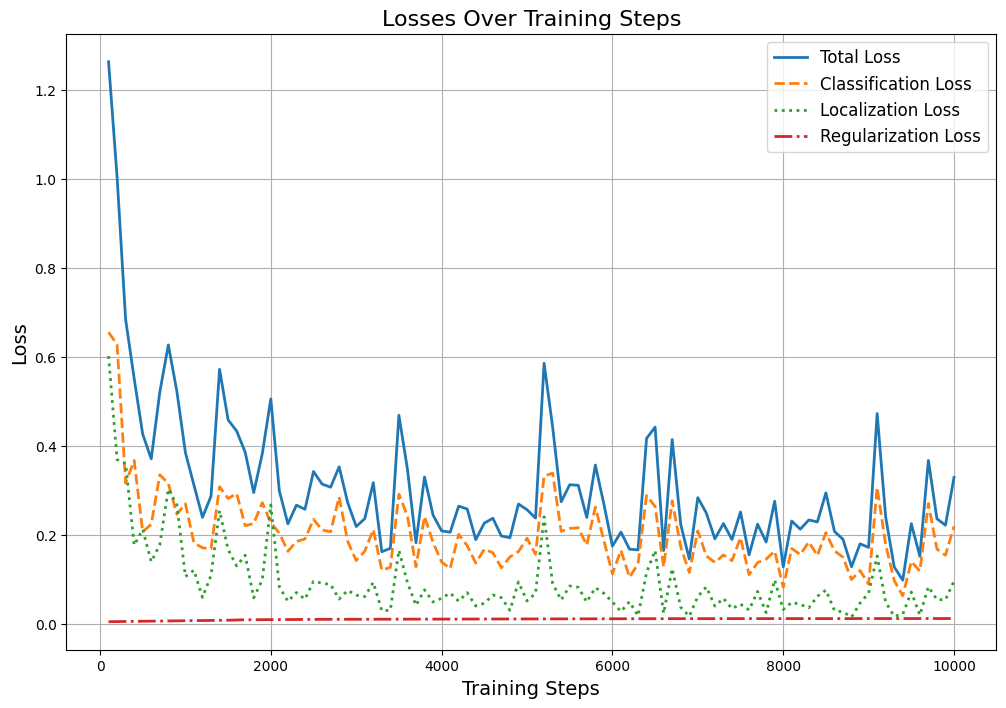

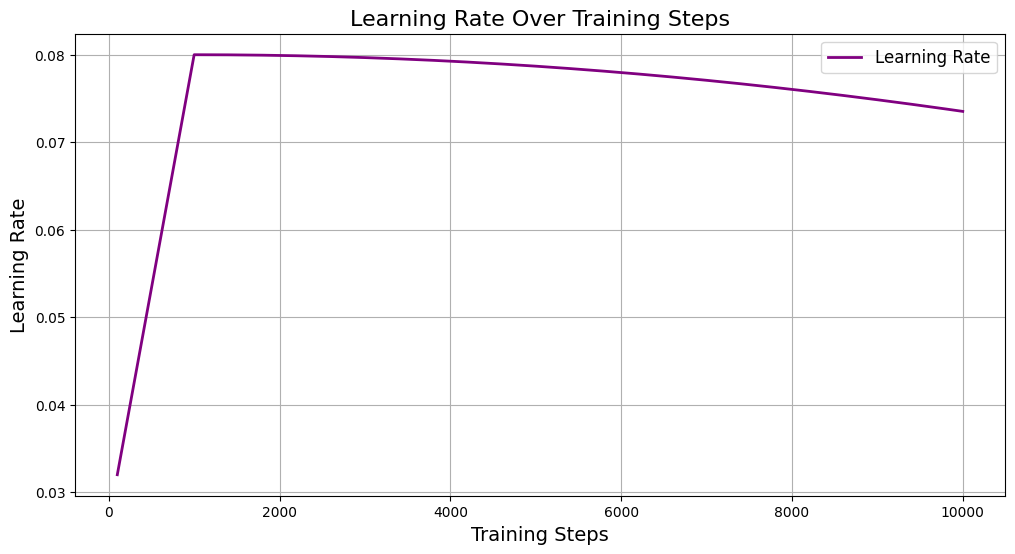

In [ ]:
import re
import matplotlib.pyplot as plt

# Path to your log file
log_file_path = "/content/extracted_pt3.log"  # Replace with your log file

# Lists to store extracted data
steps = []
classification_loss = []
localization_loss = []
regularization_loss = []
total_loss = []
learning_rate = []

# Regular expressions to match log data
step_pattern = r"Step (\d+)"
loss_pattern = r".*'Loss/classification_loss': ([0-9.]+),.*'Loss/localization_loss': ([0-9.]+),.*'Loss/regularization_loss': ([0-9.]+),.*'Loss/total_loss': ([0-9.]),.*'learning_rate': ([0-9.]+)"
localization_loss_pattern = r"'Loss/localization_loss': ([0-9.e+-]+)"
classification_loss_pattern = r"'Loss/classification_loss': ([0-9.e+-]+)"
regularization_loss_pattern = r"'Loss/regularization_loss': ([0-9.e+-]+)"
total_loss_pattern = r"'Loss/total_loss': ([0-9.e+-]+)"
learning_rate_pattern = r"'learning_rate': ([0-9.]+)"


# Parse the log file
with open(extracted_3_log_path, "r") as log_file:
    for line in log_file:
        # Extract step number
        step_match = re.search(step_pattern, line)
        if step_match:
            steps.append(int(step_match.group(1)))

        # Extract loss and learning rate values
        localization_loss_match = re.search(localization_loss_pattern, line)
        classification_loss_match = re.search(classification_loss_pattern, line)
        regularization_loss_match = re.search(regularization_loss_pattern, line)
        total_loss_match = re.search(total_loss_pattern, line)
        learning_rate_match = re.search(learning_rate_pattern, line)
        if localization_loss_match:
            localization_loss.append(float(localization_loss_match.group(1)))
            print(localization_loss_match)
        elif classification_loss_match:
            classification_loss.append(float(classification_loss_match.group(1)))
            print(classification_loss_match)
        elif regularization_loss_match:
            regularization_loss.append(float(regularization_loss_match.group(1)))
            print(regularization_loss_match)
        elif total_loss_match:
            total_loss.append(float(total_loss_match.group(1)))
            print(total_loss_match)
        elif learning_rate_match:
            learning_rate.append(float(learning_rate_match.group(1)))
            print(learning_rate_match)


# Plot the losses
plt.figure(figsize=(12, 8))

print("steps: ", steps)
print("total_loss: ",total_loss)
print("classification_loss: ",classification_loss)
print("localization_loss: ",localization_loss)
print("regularization_loss: ",regularization_loss)


# Total Loss
plt.plot(steps, total_loss, label="Total Loss", linewidth=2)

# Classification Loss
plt.plot(steps, classification_loss, label="Classification Loss", linestyle="--", linewidth=2)

# Localization Loss
plt.plot(steps, localization_loss, label="Localization Loss", linestyle=":", linewidth=2)

# Regularization Loss
plt.plot(steps, regularization_loss, label="Regularization Loss", linestyle="-.", linewidth=2)

plt.title("Losses Over Training Steps", fontsize=16)
plt.xlabel("Training Steps", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot the learning rate
plt.figure(figsize=(12, 6))
plt.plot(steps, learning_rate, label="Learning Rate", color="purple", linewidth=2)
plt.title("Learning Rate Over Training Steps", fontsize=16)
plt.xlabel("Training Steps", fontsize=14)
plt.ylabel("Learning Rate", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
# @title visualize tfrecord
import tensorflow as tf
import cv2
import numpy as np
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import dataset_util
from object_detection.utils import label_map_util
print(labelmap_path)
# Paths
TFRECORD_PATH = train_record_path  # Change to your TFRecord path
LABEL_MAP_PATH = labelmap_path  # Change to your label map path
OUTPUT_FOLDER = "/content/output_train4"  # Folder to save decoded images

# Load the label map
category_index = label_map_util.create_category_index_from_labelmap(LABEL_MAP_PATH, use_display_name=True)

# Function to parse a TFRecord
def parse_tfrecord(example_proto):
    feature_description = {
        'image/encoded': tf.io.FixedLenFeature([], tf.string),
        'image/filename': tf.io.FixedLenFeature([], tf.string, default_value=''),
        'image/format': tf.io.FixedLenFeature([], tf.string, default_value='jpeg'),
        'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),
        'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32),
        'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32),
        'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32),
        'image/object/class/label': tf.io.VarLenFeature(tf.int64),
    }
    return tf.io.parse_single_example(example_proto, feature_description)

# Function to display and save images with bounding boxes
def display_sample(sample, index):
    # Decode the image
    image = tf.io.decode_jpeg(sample['image/encoded'].numpy())
    image_np = np.array(image)

    # Extract bounding boxes and class labels
    xmin = np.array(sample['image/object/bbox/xmin'].values)
    xmax = np.array(sample['image/object/bbox/xmax'].values)
    ymin = np.array(sample['image/object/bbox/ymin'].values)
    ymax = np.array(sample['image/object/bbox/ymax'].values)
    classes = np.array(sample['image/object/class/label'].values)

    # Convert bounding box coordinates to [ymin, xmin, ymax, xmax]
    bboxes = np.stack([ymin, xmin, ymax, xmax], axis=-1)

    # Visualize the bounding boxes
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np,
        bboxes,
        classes,
        np.ones(len(classes)),  # Set scores to 1.0 for visualization
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=20,
        min_score_thresh=0.0,
        agnostic_mode=False,
    )

    # Save the image to the output folder
    output_path = f"{OUTPUT_FOLDER}/decoded_image_{index}.jpg"
    cv2.imwrite(output_path, cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR))
    print(f"Decoded image saved to {output_path}")

# Read and decode the TFRecord
raw_dataset = tf.data.TFRecordDataset(TFRECORD_PATH)
for idx, raw_record in enumerate(raw_dataset):
    parsed_record = parse_tfrecord(raw_record)
    print(f"Processing image {idx + 1}")
    display_sample(parsed_record, idx)


Streaming output truncated to the last 5000 lines.
Processing image 501
Decoded image saved to /content/output_train4/decoded_image_500.jpg
Processing image 502
Decoded image saved to /content/output_train4/decoded_image_501.jpg
Processing image 503
Decoded image saved to /content/output_train4/decoded_image_502.jpg
Processing image 504
Decoded image saved to /content/output_train4/decoded_image_503.jpg
Processing image 505
Decoded image saved to /content/output_train4/decoded_image_504.jpg
Processing image 506
Decoded image saved to /content/output_train4/decoded_image_505.jpg
Processing image 507
Decoded image saved to /content/output_train4/decoded_image_506.jpg
Processing image 508
Decoded image saved to /content/output_train4/decoded_image_507.jpg
Processing image 509
Decoded image saved to /content/output_train4/decoded_image_508.jpg
Processing image 510
Decoded image saved to /content/output_train4/decoded_image_509.jpg
Processing image 511
Decoded image saved to /content/output

export to tflite

In [ ]:
%cd /content

/content


tflite creation

In [ ]:
# @title create tflite
!python models/research/object_detection/export_tflite_graph_tf2.py \
  --pipeline_config_path {pipeline_config_path} \
  --trained_checkpoint_dir /content/models/research/object_detection/inference_graph/checkpoint \
  --output_directory tflite

2024-12-05 03:11:38.256661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-12-05 03:11:41.062081: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I1205 03:11:44.495374 139355402925184 api.py:460] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I1205 03:11:50.185343 139355402925184 api.py:460] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I1205 03:11:52.166936 139355402925184 signature_serialization.py:148] Function `inference_fn` contains input name(s) resource with unsupported characters which will be renamed to weightsharedconvolutionalboxpredictor_predictiontower_conv2d_3_batchnorm_feature_4_fusedbatchnormv3_readvariableop_1_resource in the SavedModel.
I1205 03:11:53.304738 139355402925184 api.py:460] feature_map_spatial_dims: [(40, 40), (20

In [ ]:
!tflite_convert --saved_model_dir=tflite/saved_model --output_file=tflite/model.tflite

2024-12-05 03:12:22.409567: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-12-05 03:12:24.596624: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-12-05 03:12:31.865351: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-12-05 03:12:31.865401: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.


In [ ]:
%cd content/

[Errno 2] No such file or directory: 'content/'
/content


In [ ]:
# @title tflite test inference
test_image_dir = '/content'
test_images_np = []
for i in range(1, 50):
  image_path = os.path.join(test_image_dir, 'out' + str(i) + '.jpg')
  test_images_np.append(np.expand_dims(
      load_image_into_numpy_array(image_path), axis=0))

# Again, uncomment this decorator if you want to run inference eagerly
def detect(interpreter, input_tensor):
  """Run detection on an input image.

  Args:
    interpreter: tf.lite.Interpreter
    input_tensor: A [1, height, width, 3] Tensor of type tf.float32.
      Note that height and width can be anything since the image will be
      immediately resized according to the needs of the model within this
      function.

  Returns:
    A dict containing 3 Tensors (`detection_boxes`, `detection_classes`,
      and `detection_scores`).
  """
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()

  # We use the original model for pre-processing, since the TFLite model doesn't
  # include pre-processing.
  preprocessed_image, shapes = model.preprocess(input_tensor)
  interpreter.set_tensor(input_details[0]['index'], preprocessed_image.numpy())

  interpreter.invoke()

  boxes = interpreter.get_tensor(output_details[0]['index'])
  classes = interpreter.get_tensor(output_details[1]['index'])
  scores = interpreter.get_tensor(output_details[2]['index'])
  return boxes, classes, scores

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="tflite/model.tflite")
interpreter.allocate_tensors()

# Note that the first frame will trigger tracing of the tf.function, which will
# take some time, after which inference should be fast.

label_id_offset = 1
for i in range(len(test_images_np)):
  input_tensor = tf.convert_to_tensor(test_images_np[i], dtype=tf.float32)
  boxes, classes, scores = detect(interpreter, input_tensor)

  # plot_detections(
  #     test_images_np[i][0],
  #     boxes[0],
  #     classes[0].astype(np.uint32) + label_id_offset,
  #     scores[0],
  #     category_index, figsize=(15, 20), image_name="gif_frame_" + ('%02d' % i) + ".jpg")


NotFoundError: /content/out1.jpg; No such file or directory

In [ ]:
!pip install tflite-support

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 20.1 MB/s eta 0:00:00


In [ ]:
# Define the content of the labelmap.pbtxt file
labelmap_content = "circle\nline"

# Specify the filename
filename = "label.txt"

# Write the content to the file
with open(filename, "w") as file:
    file.write(labelmap_content)

print(f"{filename} has been created with two items: circle and line.")


label.txt has been created with two items: circle and line.


In [ ]:
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import writer_utils

# Paths to your files
MODEL_PATH = "/content/tflite/model.tflite"
UPDATED_MODEL_PATH = "/content/tflite/finetuned_circle_with_metadata12-3.tflite"
LABEL_FILE = "/content/label.txt"  # A plain-text file with one label per line (e.g., "circle")

# Create metadata writer for object detection
writer = object_detector.MetadataWriter.create_for_inference(
    writer_utils.load_file(MODEL_PATH),
    input_norm_mean=[127.5],  # Assuming the input needs normalization to [-1, 1]
    input_norm_std=[127.5],
    label_file_paths=[LABEL_FILE],
)

# Add metadata to the model
writer_utils.save_file(writer.populate(), UPDATED_MODEL_PATH)
print(f"Updated TFLite model with metadata saved at: {UPDATED_MODEL_PATH}")


Updated TFLite model with metadata saved at: /content/tflite/finetuned_circle_with_metadata12-3.tflite


In [ ]:
# Load model
interpreter = tf.lite.Interpreter(model_path="/content/tflite/model.tflite")
interpreter.allocate_tensors()

# Prepare input image (resize and normalize as needed)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Assuming input image is already resized to required dimensions
image = np.expand_dims('/content/train_images3/horizontal_line_1.jpg', axis=0).astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], image)

# Run inference
interpreter.invoke()
detections = interpreter.get_tensor(output_details[0]['index'])
print(detections)

ValueError: could not convert string to float: '/content/train_images3/horizontal_line_1.jpg'